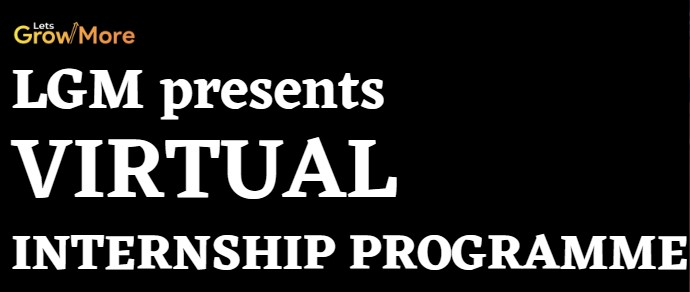

# **Task-2 : Next Word Prediction (Advance Level Task)**
Using Tensorflow and keras library train a RNN, to predict the next word.

***Dataset used link*** : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

## A look into dataset

In [ ]:
#importing libraries
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
path = '/content/1661-0.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


splitting dataset into words without some special characters

In [ ]:
from nltk.tokenize import RegexpTokenizer
#A ``RegexpTokenizer`` splits a string into substrings using a regular expression.
#For example, the following tokenizer forms tokens out of alphabetic sequences,
#money expressions, and any other non-whitespace sequences
#To separate a sentence into words without puctuation, we use RegexpTokenizer(r'\w+') as our tokenizer.
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

## Preprocessing Data

In [ ]:
ca = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(ca))
i_char = dict((i, c) for i, c in enumerate(ca))
 
print(f'unique chars: {len(ca)}')

unique chars: 73


In [ ]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


## Storing Features and their labels accordingly

In [ ]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(ca)), dtype=bool)
y = np.zeros((len(sentences), len(ca)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [ ]:
#enocoded data
print(X[0][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True]


In [ ]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
X.shape

(193950, 40, 73)

In [ ]:
y.shape

(193950, 73)

## Using LSTM (long short term memory) very powerful RNN for building the model

In [ ]:
# Creating the model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(ca))))
model.add(Dense(len(ca)))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


## Visualisation of the model built

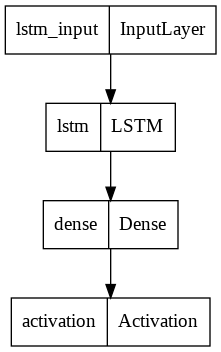

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

## Training the model

In [ ]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=4, 
                    shuffle=True).history

Epoch 1/4
1501/1501 [==============================] - 176s 116ms/step - loss: 1.9429 - accuracy: 0.4282 - val_loss: 2.1943 - val_accuracy: 0.3928
Epoch 2/4
1501/1501 [==============================] - 173s 115ms/step - loss: 1.6113 - accuracy: 0.5177 - val_loss: 2.1423 - val_accuracy: 0.4289
Epoch 3/4
1501/1501 [==============================] - 175s 116ms/step - loss: 1.5174 - accuracy: 0.5433 - val_loss: 2.0342 - val_accuracy: 0.4459
Epoch 4/4
1501/1501 [==============================] - 175s 116ms/step - loss: 1.4680 - accuracy: 0.5569 - val_loss: 1.9917 - val_accuracy: 0.4732


## Save and load the model

In [ ]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

## Visualising Loss and Accuracy of the model

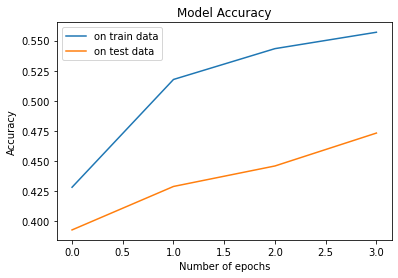

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['on train data', 'on test data'], loc='upper left')

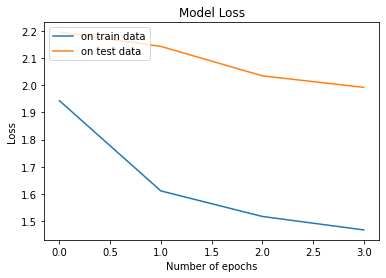

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['on train data', 'on test data'], loc='upper left')

## Predicting Next Word

In [ ]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(ca)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = i_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [ ]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [i_char[idx] + predict_completion(text[1:] + i_char[idx]) for idx in next_indices]

In [ ]:
quotes = [   
    "Predicting the future isn’t magic, it’s artificial intelligence",
    "The potential benefits of artificial intelligence are huge, so are the dangers",
    "Humans should be worried about the threat posed by artificial intelligence.",
    "Machine learning and deep learning will create a new set of hot jobs in the next 5 years.",
    "Data is the new science. Big Data holds the answers"
    
]

In [ ]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

predicting the future isn’t magic, it’s 
['a ', 'the ', 'one ', 'for ', 'so ']

the potential benefits of artificial int
['o ', 'erest ', 'ruated ', 'airs ', 'ilar ']

humans should be worried about the threa
['thing ', 'rs. ', 'king ', 'der ', 'ps. ']

machine learning and deep learning will 
['be ', 'have ', 'started ', 'find ', 'you ']

data is the new science. big data holds 
['of ', 'and ', 'that ', 'in ', 'which ']



# ***By: Komal Reddy K***